# Resume Classification
       The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention

In [1]:
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.listdir('resume/')

['.ipynb_checkpoints',
 'peoplesoft_resume',
 'React_Dev',
 'SQL_Developer_Lightning_insight',
 'workday_resume']

In [3]:
#Extracting text from dataset

file_path1 = []
category1  = []
directory1 = 'resume/peoplesoft_resume'
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')

In [4]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
1,Classification: Internal\n\nClassification: In...,PeopleSoft
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
4,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft


In [5]:
file_path2 = []
category2  = []
directory2 = 'resume/React_Dev'
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React_Developer')

In [6]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,Name: Ravali P \n\n\n\n ...,React_Developer
1,SUSOVAN BAG \n\nSeeking a challenging po...,React_Developer
2,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React_Developer
3,HARIPRIYA BATTINA \n\nExperience as UI Develop...,React_Developer
4,KAMALAKAR REDDY. A \n\nLinked In: https://www....,React_Developer
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React_Developer
6,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React_Developer
7,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React_Developer
8,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React_Developer
9,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React_Developer


In [7]:
file_path3 = []
category3  = []
directory3 = 'resume/SQL_Developer_Lightning_insight'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL_Developer')

In [8]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL_Developer
1,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL_Developer
2,BUDDHA VAMSI ...,SQL_Developer
3,KAMBALLA PRADEEP ...,SQL_Developer
4,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL_Developer
5,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL_Developer
6,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL_Developer
7,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL_Developer
8,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL_Developer
9,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL_Developer


In [9]:
file_path4 = []
category4  = []
directory4 = 'resume/workday_resume'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')

In [10]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday
1,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday
2,G Himaja\n\n ...,Workday
3,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday
4,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday
5,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,Workday
6,Workday HCM Techno functional Consultant ...,Workday
7,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Workday
8,Srikanth (WORKDAY hCM Consultant)\t ...,Workday
9,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday


## Creating Dataframe

In [11]:
resume_data = data1.append([data2, data3, data4], ignore_index = True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN
1,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN
4,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,NaN,NaN,NaN
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN


In [12]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  52 non-null     object
 1   Category1    10 non-null     object
 2   Category2    20 non-null     object
 3   Category3    11 non-null     object
 4   Category4    11 non-null     object
dtypes: object(5)
memory usage: 2.2+ KB


In [13]:
#Merge all columns into one column

resume_data['Category'] = category1 + category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
1,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN,PeopleSoft
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
4,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
5,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
6,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
8,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
9,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN,PeopleSoft


In [14]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]

In [15]:
#Final Dataset

resume_data.head(10)

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,Classification: Internal\n\nClassification: In...
2,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
3,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
4,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
5,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
6,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
7,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...
8,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
9,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...


In [16]:
#Save CSV file

resume_data.to_csv('Raw_Resume.csv', index=False)

In [17]:
#Loading New dataset

resume_data = pd.read_csv("Raw_Resume.csv")
resume_data

,Category,Raw_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
1,PeopleSoft,Classification: Internal\n\nClassification: In...
2,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
3,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
4,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
5,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
6,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
7,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...
8,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
9,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...


In [18]:
resume_data[resume_data.Category == 'Workday']

,Category,Raw_Details
41,Workday,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...
42,Workday,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...
43,Workday,G Himaja\n\n ...
44,Workday,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...
45,Workday,Mooraboyina Guravaiah\n\nWorkday Integration S...
46,Workday,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...
47,Workday,Workday HCM Techno functional Consultant ...
48,Workday,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...
49,Workday,Srikanth (WORKDAY hCM Consultant)\t ...
50,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...


In [19]:
resume_data.isnull().sum()

Category       0
Raw_Details    0
dtype: int64

# Number of Words in each Resume

In [20]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023
1,Classification: Internal\n\nClassification: In...,558
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918
4,PeopleSoft Administration\n\n \n\nVivekanand S...,2585


# Number of Characters

In [21]:
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,8010
1,Classification: Internal\n\nClassification: In...,4917
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",3800
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,7943
4,PeopleSoft Administration\n\n \n\nVivekanand S...,16112


# Number of Stopwords

In [22]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

,Raw_Details,Stopwords
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,190
1,Classification: Internal\n\nClassification: In...,114
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",86
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,225
4,PeopleSoft Administration\n\n \n\nVivekanand S...,520


# Number of Numeric

In [23]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,4
1,Classification: Internal\n\nClassification: In...,7
2,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",15
3,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,4
4,PeopleSoft Administration\n\n \n\nVivekanand S...,17


In [24]:
resume_data.head(10)

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023,8010,190,4
1,PeopleSoft,Classification: Internal\n\nClassification: In...,558,4917,114,7
2,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455,3800,86,15
3,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918,7943,225,4
4,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,2585,16112,520,17
5,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,448,3714,88,13
6,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,433,3669,84,13
7,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,540,3577,136,3
8,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,363,2852,98,4
9,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,356,2150,42,8


# Text Pre-processing

### Using Regular Expression

In [25]:
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [26]:
resume_data = pd.read_csv('Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))

# Clean Text from Resume

In [27]:
resume_data

,Category,Raw_Details,Resume_Details
0,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...
2,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,peoplesoft admin varkala vikas career objectiv...
4,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,peoplesoft administration vivekanand sayana ca...
5,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,hari narayana professional summary years exper...
6,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,murali professional summary years experience p...
7,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,priyabrata hota career objective pursuing peop...
8,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,tanna sujatha objective seeking challenging ro...
9,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,address manyata tech park nagavara bangalore l...


In [28]:
#Saving Cleaned File

resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,classification internal classification interna...
2,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
4,PeopleSoft,peoplesoft administration vivekanand sayana ca...
5,PeopleSoft,hari narayana professional summary years exper...
6,PeopleSoft,murali professional summary years experience p...
7,PeopleSoft,priyabrata hota career objective pursuing peop...
8,PeopleSoft,tanna sujatha objective seeking challenging ro...
9,PeopleSoft,address manyata tech park nagavara bangalore l...


In [29]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [30]:
#Read Cleaned Dataset

resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,classification internal classification interna...
2,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
4,PeopleSoft,peoplesoft administration vivekanand sayana ca...
5,PeopleSoft,hari narayana professional summary years exper...
6,PeopleSoft,murali professional summary years experience p...
7,PeopleSoft,priyabrata hota career objective pursuing peop...
8,PeopleSoft,tanna sujatha objective seeking challenging ro...
9,PeopleSoft,address manyata tech park nagavara bangalore l...


# Named Entity Recognition (NER)

In [31]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 330), ('using', 253), ('workday', 232), ('sql', 213), ('application', 208), ('server', 188), ('project', 183), ('data', 180), ('reports', 170), ('peoplesoft', 169), ('business', 165), ('web', 145), ('knowledge', 136), ('react', 132), ('process', 123), ('skills', 118), ('system', 116), ('good', 108), ('client', 105), ('tools', 102), ('working', 101), ('involved', 99), ('database', 99), ('various', 97), ('creating', 97), ('hcm', 94), ('support', 94), ('like', 94), ('developer', 94), ('worked', 93), ('integrations', 92), ('development', 91), ('technical', 89), ('integration', 87), ('servers', 86), ('services', 85), ('report', 83), ('people', 81), ('created', 80), ('html', 80), ('design', 78), ('used', 77), ('role', 74), ('team', 74), ('responsibilities', 72), ('work', 71), ('studio', 71), ('eib', 71), ('testing', 70), ('professional', 69)]


# Extract Resume by Profile Category

In [32]:
file_path = r'Resume/'
file_name = []
profile   = []
            
for folder in os.listdir(file_path):
    folder_path = file_path+folder
    for file in os.listdir(folder_path):
        if file.endswith('.doc'):
            profile.append(folder)
            file_name.append(file)
        elif file.endswith('.docx'):
            profile.append(folder)
            file_name.append(file)
        else:
            profile.append(folder)
            file_name.append(file)
            file_name.append(file)

In [33]:
#profile

In [34]:
#len(file_name)
import pandas as pd

# Assuming you have a 'profile' list and 'file_name' list with at least 81 elements
# Replace the following lines with your actual 'profile' and 'file_name' lists

profile = [f"Profile_{i}" for i in range(100)]
file_name = [f"File_{i}.pdf" for i in range(100)]

# Verify that both lists have at least 81 elements
assert len(profile) >= 81, "Profile list should have at least 81 elements"
assert len(file_name) >= 81, "File_name list should have at least 81 elements"

# Create the DataFrame using the first 81 elements of each list
resume_data = pd.DataFrame()
resume_data['Profile'] = profile[:81]
resume_data['Resumes'] = file_name[:81]

print(resume_data)


       Profile      Resumes
0    Profile_0   File_0.pdf
1    Profile_1   File_1.pdf
2    Profile_2   File_2.pdf
3    Profile_3   File_3.pdf
4    Profile_4   File_4.pdf
..         ...          ...
76  Profile_76  File_76.pdf
77  Profile_77  File_77.pdf
78  Profile_78  File_78.pdf
79  Profile_79  File_79.pdf
80  Profile_80  File_80.pdf

[81 rows x 2 columns]


In [35]:
import pandas as pd

resume_data = pd.DataFrame()

# Verify that both lists have at least 81 elements
assert len(profile) >= 81, "Profile list should have at least 81 elements"
assert len(file_name) >= 81, "File_name list should have at least 81 elements"

# Create the DataFrame using the first 81 elements of each list
resume_data = pd.DataFrame()
resume_data['Profile'] = profile[:81]
resume_data['Resumes'] = file_name[:81]

print(resume_data)


       Profile      Resumes
0    Profile_0   File_0.pdf
1    Profile_1   File_1.pdf
2    Profile_2   File_2.pdf
3    Profile_3   File_3.pdf
4    Profile_4   File_4.pdf
..         ...          ...
76  Profile_76  File_76.pdf
77  Profile_77  File_77.pdf
78  Profile_78  File_78.pdf
79  Profile_79  File_79.pdf
80  Profile_80  File_80.pdf

[81 rows x 2 columns]


In [36]:
resume_data.Profile.value_counts().index

Index(['Profile_0', 'Profile_41', 'Profile_59', 'Profile_58', 'Profile_57',
       'Profile_56', 'Profile_55', 'Profile_54', 'Profile_53', 'Profile_52',
       'Profile_51', 'Profile_50', 'Profile_49', 'Profile_48', 'Profile_47',
       'Profile_46', 'Profile_45', 'Profile_44', 'Profile_43', 'Profile_60',
       'Profile_61', 'Profile_62', 'Profile_72', 'Profile_79', 'Profile_78',
       'Profile_77', 'Profile_76', 'Profile_75', 'Profile_74', 'Profile_73',
       'Profile_71', 'Profile_63', 'Profile_70', 'Profile_69', 'Profile_68',
       'Profile_67', 'Profile_66', 'Profile_65', 'Profile_64', 'Profile_42',
       'Profile_40', 'Profile_1', 'Profile_39', 'Profile_18', 'Profile_17',
       'Profile_16', 'Profile_15', 'Profile_14', 'Profile_13', 'Profile_12',
       'Profile_11', 'Profile_10', 'Profile_9', 'Profile_8', 'Profile_7',
       'Profile_6', 'Profile_5', 'Profile_4', 'Profile_3', 'Profile_2',
       'Profile_19', 'Profile_20', 'Profile_21', 'Profile_31', 'Profile_38',
       'P

In [37]:
resume_data.Profile.value_counts()

Profile_0     1
Profile_41    1
Profile_59    1
Profile_58    1
Profile_57    1
             ..
Profile_26    1
Profile_25    1
Profile_24    1
Profile_23    1
Profile_80    1
Name: Profile, Length: 81, dtype: int64

# Number of Profiles in Resume

ValueError: 'explode' must be of length 'x'

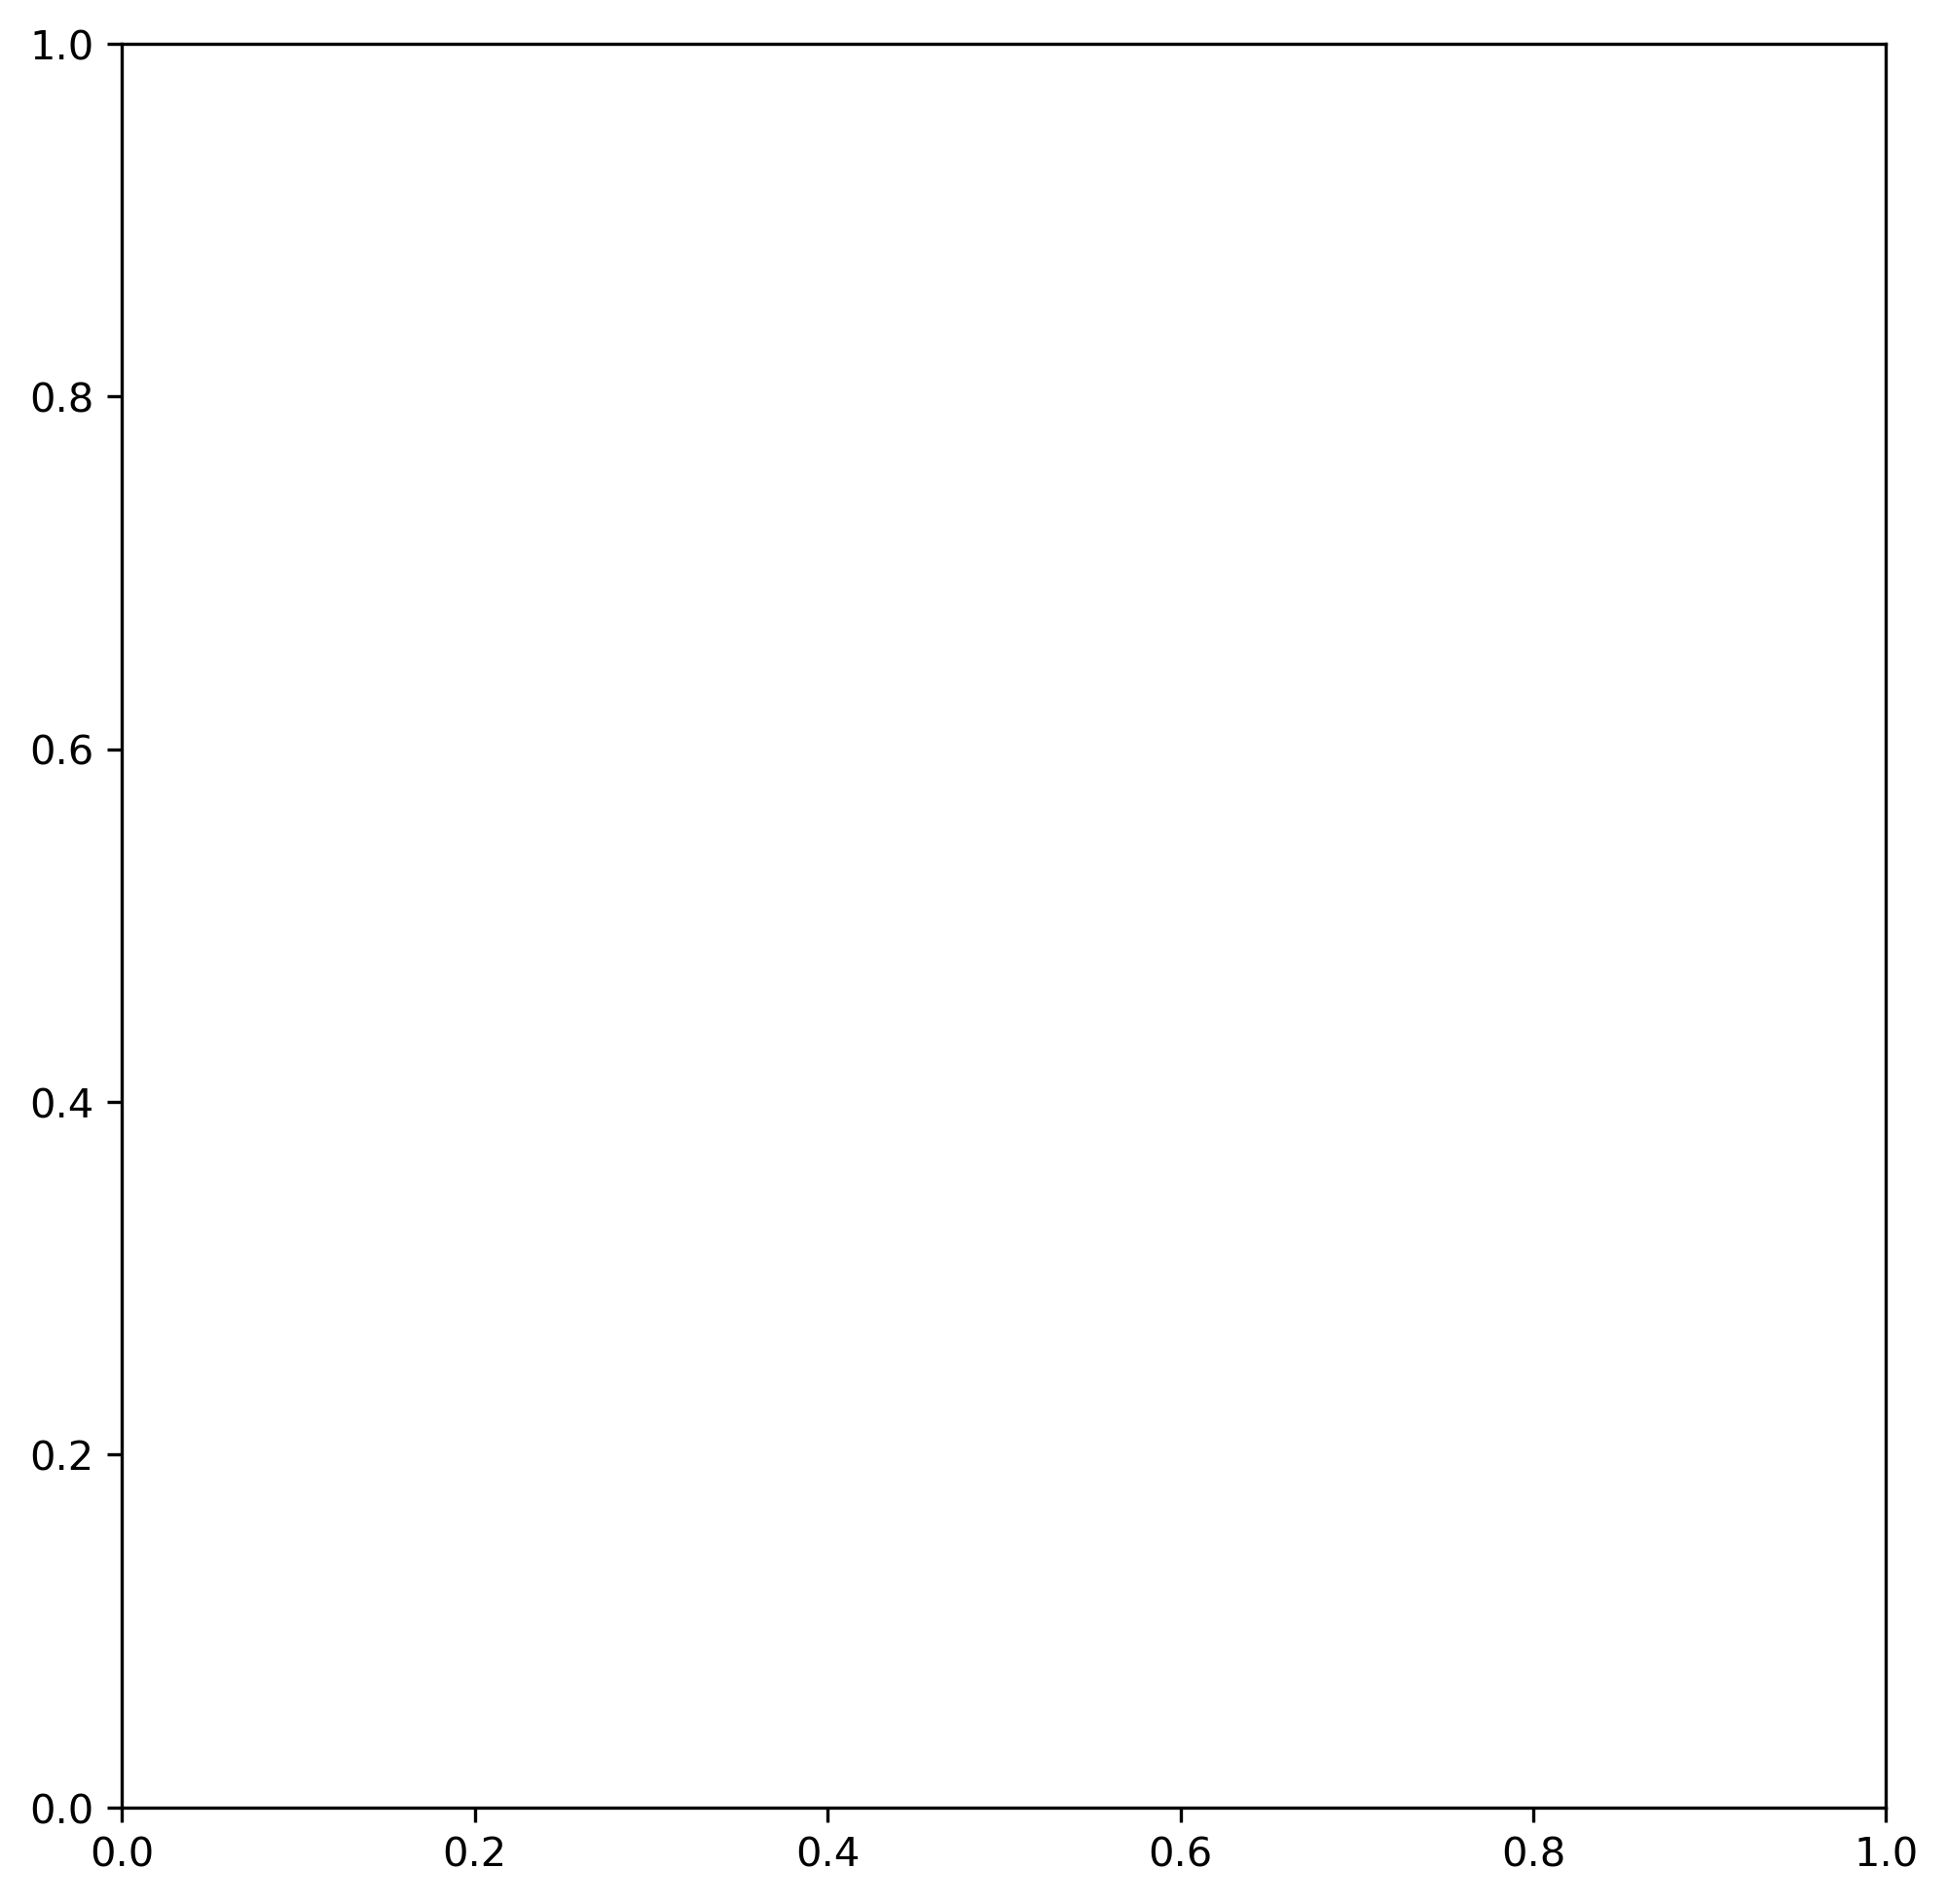

In [44]:
# import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
plt.rcParams['figure.dpi'] = 300

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#A1F603', '#03F68B']
explode = (0.01, 0.01, 0.01, 0.01)



plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct=lambda x: '{:.0f}'.format(x * sizes.sum() / 100),
       pctdistance=0.85, shadow=True)

centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize=18, fontweight='bold')
plt.legend(labels, loc="center")

fig.tight_layout()
plt.show()



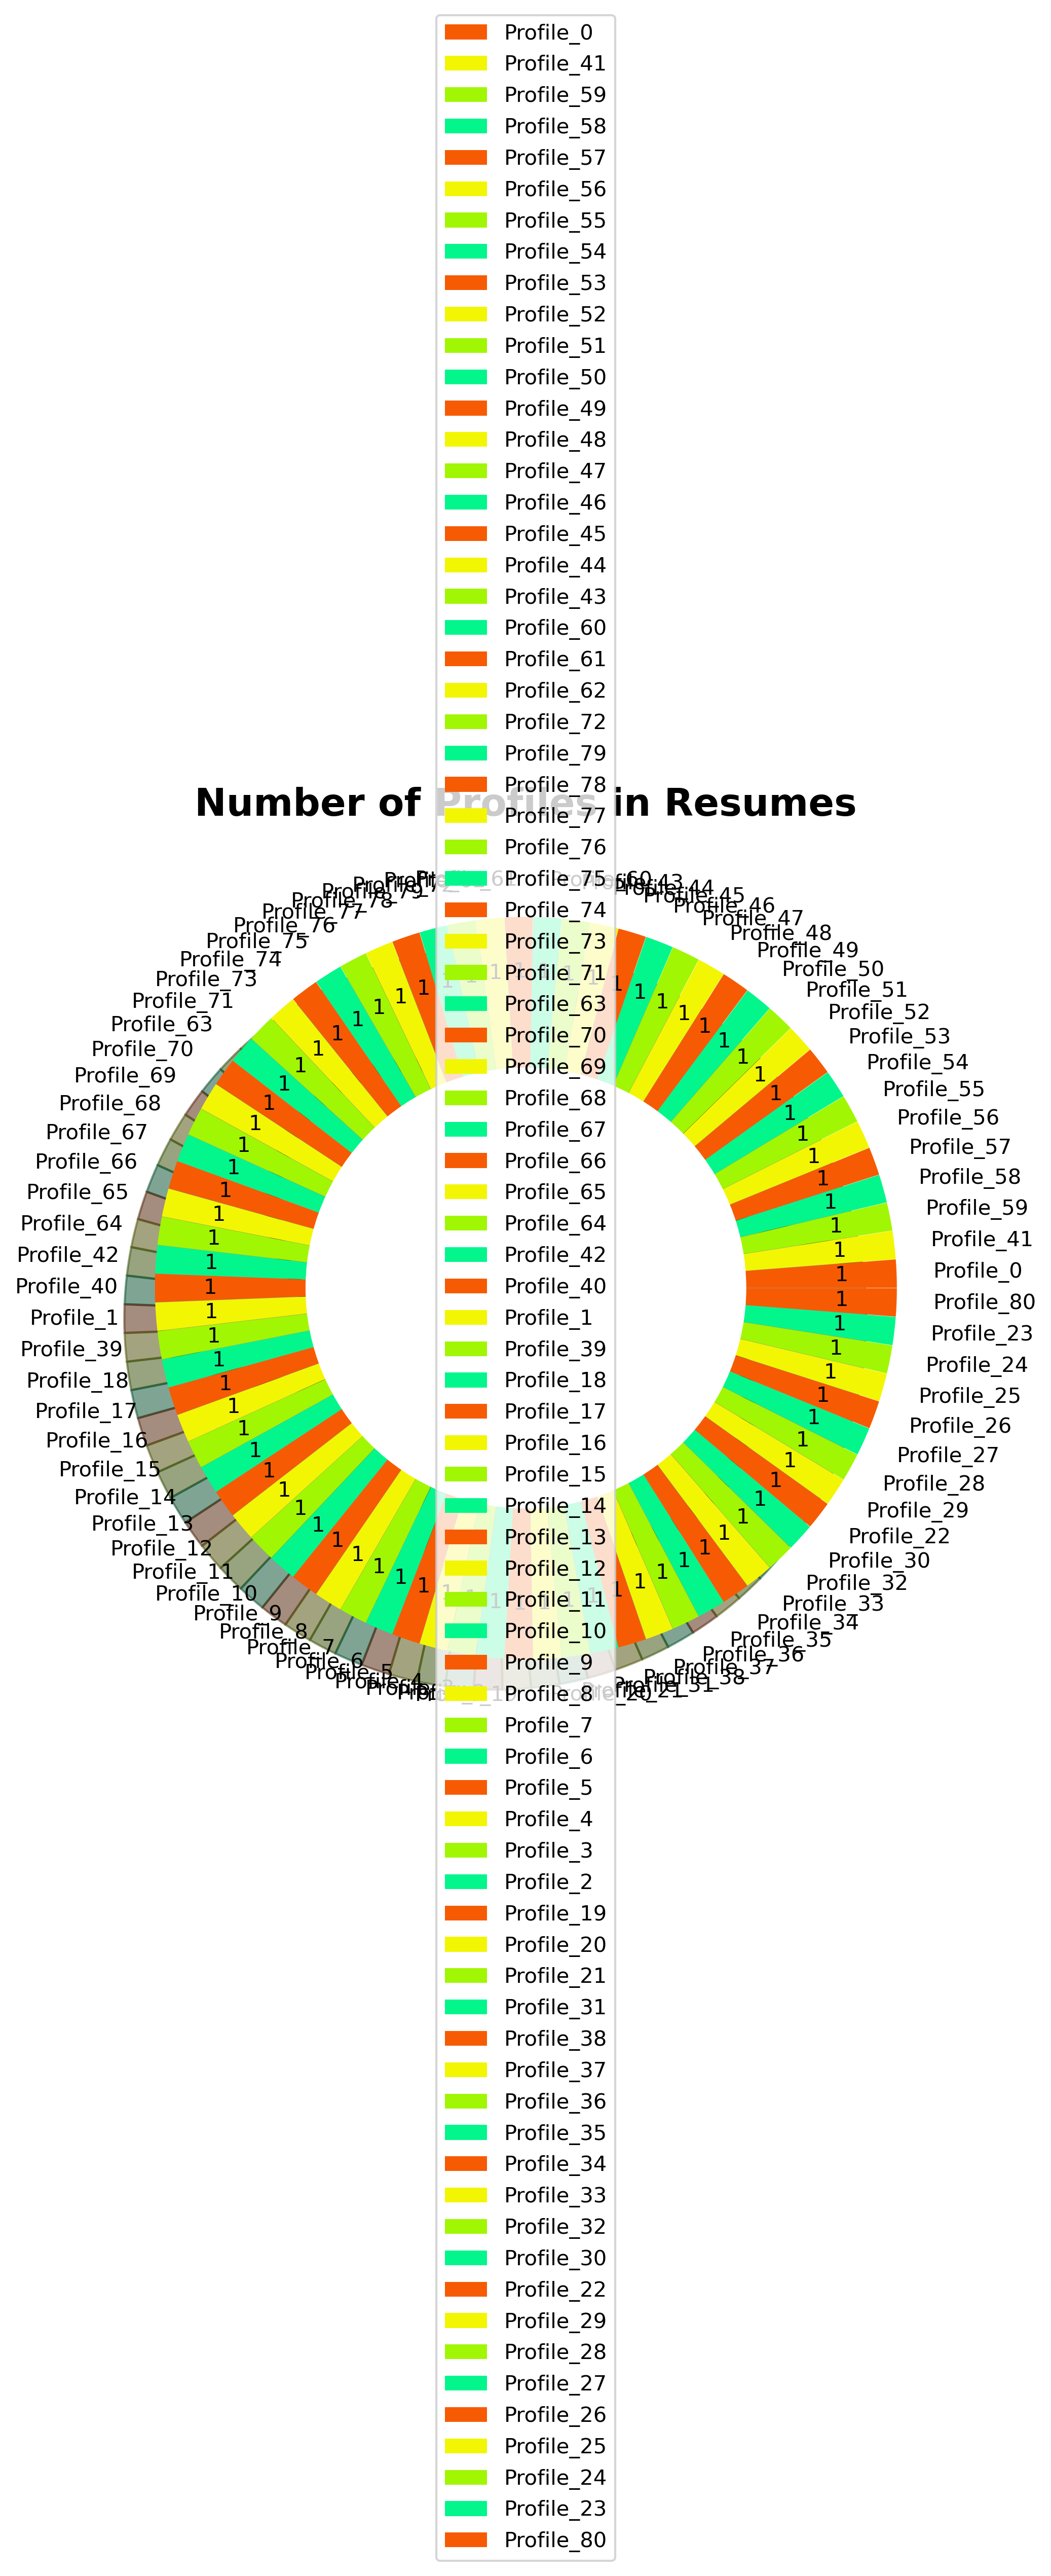

In [41]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
plt.rcParams['figure.dpi'] = 300

sizes = resume_data['Profile'].value_counts()
labels = resume_data['Profile'].value_counts().index
colors = ['#F65B03', '#F2F603', '#A1F603', '#03F68B']
# Adjust the explode variable to have the same number of elements as 'sizes'
explode = [0.01] * len(sizes)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct=lambda x: '{:.0f}'.format(x * sizes.sum() / 100),
        pctdistance=0.85, shadow=True)

centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize=18, fontweight='bold')
plt.legend(labels.tolist(), loc="center")  # Convert labels to a list using .tolist()

fig.tight_layout()
plt.show()


# Percentage of Profiles in Resume

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8)) 

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#E8C110']
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance=0.85, explode= explode, 
        startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")


fig.tight_layout()
plt.show()

# Data Exploration

In [ ]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

# N-grams
   - **N-grams analyses are often used to see which word often show up together.**

In [ ]:
from textblob import TextBlob

TextBlob(resume_data['Resume_Details'][1]).ngrams(1)[:20]

In [ ]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(2)[:20]

In [ ]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(3)[:20]

In [ ]:
resume_data['Resume_Details']

# Top 20 most used words in Resumes

In [ ]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [ ]:
df_ngram

In [ ]:
fig, axe = plt.subplots(1,1, figsize=(12,6))
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(20), y=df_ngram.Frequency.head(20), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 20 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

fig.tight_layout()
plt.show()

# Using Word Cloud

In [ ]:
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 18, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

plt.show()

# Model Building

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
#!pip install xgboost

In [ ]:
resume_data.head(10)

# Train-Test Split

In [ ]:
x = resume_data['Resume_Details'].values
y = resume_data['Category'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=143, test_size=0.25)
x_train.shape, x_test.shape

### Vectorization

In [ ]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [ ]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [ ]:
x_train.shape, x_test.shape

In [ ]:
print(y_train),print(y_test)

# Classification Models

## KNN Classifier

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=39)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set: {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))


nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

## Adaboost Classifier

In [ ]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

## Decision Tree Classifier

In [ ]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_DT, x_train, y_train, cv = kfold)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

## Random Forest Classifier

In [ ]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_RF, x_train, y_train, cv = kfold)

precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

## Support Vector Machine (SVM) Classifier

In [ ]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_svm, x_train, y_train, cv = kfold)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

## Logostic Regression

In [ ]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_lgr, x_train, y_train, cv = kfold)

precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

## Bagging Classifier

In [ ]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_bagg, x_train, y_train, cv = kfold)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

## Gradient Boosting Classifier

In [ ]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_GradientBoost, x_train, y_train, cv = kfold)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

## Naive Bayes Classifier 

In [ ]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)
results = cross_val_score(model_NB, x_train, y_train, cv = kfold)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

# Model Evaluation

In [ ]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table
    


In [ ]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

# Train And Test Accuracy Plot

In [ ]:
rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6))
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)
    
for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

fig.tight_layout()
plt.show()